In [ ]:
# Librerías principales
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Verificar versión
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [ ]:
#Montar GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

#ruta al disco = '/content/drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DatosDiabetes.csv')

print(df.head())

      glucosa     presion        imc       edad  colesterol  frecuencia  \
0  122.417854  140.990332  22.624109  22.106309  164.095192   70.762403   
1  106.543392  133.869505  25.277407  34.675380  189.063895   70.465859   
2  126.192213  120.894456  22.037900  40.036734  190.540506   57.043568   
3  148.075746  110.295948  24.460192  67.652252  204.178910   71.699098   
4  104.146166  130.473350  16.531927  51.678637  148.994249   82.328291   

   diabetes  
0         0  
1         0  
2         0  
3         1  
4         0  


In [ ]:
# 🔹 División en train/test
X = df.drop('diabetes', axis=1).values
y = df['diabetes'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X[:5]

array([[122.41785383, 140.99033155,  22.62410863,  22.10630931,
        164.09519185,  70.76240318],
       [106.54339247, 133.86950524,  25.27740665,  34.67537987,
        189.06389533,  70.46585892],
       [126.19221345, 120.89445555,  22.0379004 ,  40.0367336 ,
        190.54050616,  57.04356827],
       [148.07574641, 110.29594833,  24.46019235,  67.65225189,
        204.17891038,  71.69909808],
       [104.14616563, 130.4733497 ,  16.53192667,  51.67863749,
        148.9942491 ,  82.32829082]])

In [ ]:
# Normalización
# Escalamos las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # salida binaria
    #Dense(1, activation='softmax') #salida multiclase
])

# Creamos el optimizador con learning rate constante
optimizer = Adam(learning_rate=0.001)  # valor fijo

# Compilamos el modelo
model.compile(
    optimizer= optimizer,
    loss='binary_crossentropy',
#   loss='sparse_categorical_crossentropy', #se usa con la activacion softmax
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenamos el modelo
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4293 - loss: 0.7247 - val_accuracy: 0.5625 - val_loss: 0.6891
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6392 - loss: 0.6809 - val_accuracy: 0.7437 - val_loss: 0.6580
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7519 - loss: 0.6507 - val_accuracy: 0.8188 - val_loss: 0.6291
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7841 - loss: 0.6254 - val_accuracy: 0.8188 - val_loss: 0.6025
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7957 - loss: 0.5991 - val_accuracy: 0.8188 - val_loss: 0.5735
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8238 - loss: 0.5537 - val_accuracy: 0.8188 - val_loss: 0.5449
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8195 - loss: 0.5244 - val_accuracy: 0.8188 - val_loss: 0.5170
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8457 - loss: 0.4776 - val_accuracy: 0.8250 - val_loss

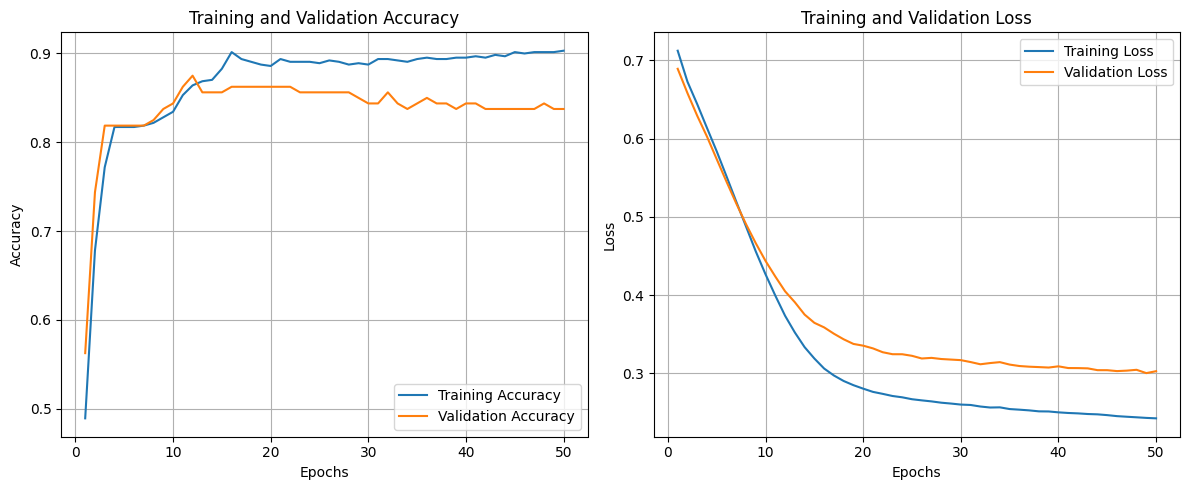

In [ ]:
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy en datos de prueba: {test_acc:.4f}")

Accuracy en datos de prueba: 0.8850


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


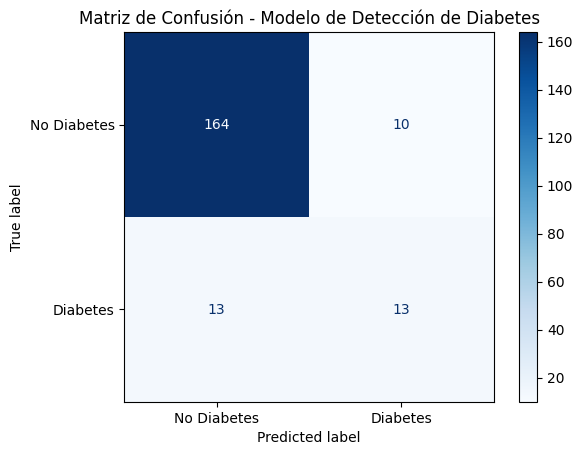

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 🔹 Paso 1: Obtener las predicciones del modelo
predictions = model.predict(X_test)

# Convertimos las probabilidades (0 a 1) a etiquetas binarias (0 o 1)
pred_labels = (predictions > 0.5).astype(int).flatten()

# 🔹 Paso 2: Calcular la matriz de confusión
cm = confusion_matrix(y_test, pred_labels)

# 🔹 Paso 3: Mostrarla gráficamente
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues', values_format='d')  # 'd' muestra enteros
plt.title("Matriz de Confusión - Modelo de Detección de Diabetes")
plt.show()

In [ ]:
model.save('ModeloDiabetes.keras')
#model.save('ModeloDiabetes.h5') #h5 formato para guardar el modelo

In [ ]:
modelo_cargado_tf = tf.keras.models.load_model('ModeloDiabetes.keras')
#modelo_cargado_tf = tf.keras.models.load_model('ModeloDiabetes.h5')

In [ ]:
p=np.array([122.41785383, 140.99033155,  22.62410863,  22.10630931,
        164.09519185,  70.76240318])
p=p.reshape(1,-1)
p=scaler.transform(p)
prediccion = round(modelo_cargado_tf.predict(p)[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [ ]:
if (prediccion==1):
  print("Tiene diabetes")
else:
  print("No tiene diabetes")

No tiene diabetes


In [ ]:
prediccion

0